<a href="https://colab.research.google.com/github/jpenao6/DS-Portfolio/blob/main/Employee_Business_Analytics_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Table of Content**
1.   Problem Statetement
  - Preliminary Datasets Exploration
  - Dataset Selection Rationale
  - Research Question Definition
  - Data Cleaning
1.   Analysis
  - Exploratory Data Analysis (EDA)
  - Hypothesis testing
  - Model Building
  - Results Interpretation
1.   Managerial Recommendations
1.   Conclusions
1. References

**Disclaimer:** Visualisations will be carried out along the different sections mentioned on the previous step.

---

## **1. Problem Statement**

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import iqr
import matplotlib.pyplot as plt
import seaborn as sns

### **1.1 Preliminary Datasets Exploration**

I will import the 3 datasets under consideration. For each of the datasets I will give a preliminary analysis which considers:

1. Read each dataset one by one.
1. Shape of the dataset to understand the amount of data we are studying.
1. Columns method to verify the different variables on my dataset.
1. Info method to understand the type of data in the dataset and if there are null values.
1. Count the number of null values in the dataset

From the previous preliminar analysis a common understanding of a dataset can be identified. Once identified, a research method suited for the selected dataset would be selected either Descriptive or Predictive will depend on the selected dataset.

**Dataset 1: ONLINE RETAILERS**

In [ ]:
df = pd.read_csv('/content/DATASET1_ONLINE_RETAILERS.csv')
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [ ]:
df.shape

(10999, 12)

In [ ]:
df.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [ ]:
df.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

Based from the preliminary analysis it can be identified that the dataset is structured data and has 10999 entries and 12 variables (columns). These variables are both numerical and categorical. From the variable analysis the column "Reached.on.Time_Y.N" can be used for a predictive analysis and the column "Customer_rating" can be used for a descriptive analysis. Apparrently the dataset has not null values therefore the data cleaning process can focus on mapping the categorical values into number in order to be used for predictive algorithms.

**Dataset 2: APPS**

In [ ]:
df = pd.read_csv('/content/DATASET2_APPS.csv')
df.head()

,Unnamed: 0,app,category,rating,reviews,installs,type,price,content_rating,genres,current_ver,android_ver,size(kb),update_month,update_year
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,10000,0,0.0,Everyone,Art & Design,1.0.0,4.0.3,19000.0,1,2018
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,0,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3,14000.0,1,2018
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,5000000,0,0.0,Everyone,Art & Design,1.2.4,4.0.3,8.7,8,2018
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,50000000,0,0.0,Teen,Art & Design,NaN,4.2,25000.0,6,2018
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,100000,0,0.0,Everyone,Art & Design;Creativity,1.1,4.4,2.8,6,2018


In [ ]:
df.shape

(9658, 15)

In [ ]:
df.columns

Index(['Unnamed: 0', 'app', 'category', 'rating', 'reviews', 'installs',
       'type', 'price', 'content_rating', 'genres', 'current_ver',
       'android_ver', 'size(kb)', 'update_month', 'update_year'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9658 entries, 0 to 9657
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9658 non-null   int64  
 1   app             9658 non-null   object 
 2   category        9658 non-null   object 
 3   rating          8196 non-null   float64
 4   reviews         9658 non-null   int64  
 5   installs        9658 non-null   int64  
 6   type            9658 non-null   int64  
 7   price           9658 non-null   float64
 8   content_rating  9658 non-null   object 
 9   genres          9658 non-null   object 
 10  current_ver     8596 non-null   object 
 11  android_ver     8667 non-null   object 
 12  size(kb)        8432 non-null   float64
 13  update_month    9658 non-null   int64  
 14  update_year     9658 non-null   int64  
dtypes: float64(3), int64(6), object(6)
memory usage: 1.1+ MB


In [ ]:
df.isna().sum()

Unnamed: 0           0
app                  0
category             0
rating            1462
reviews              0
installs             0
type                 0
price                0
content_rating       0
genres               0
current_ver       1062
android_ver        991
size(kb)          1226
update_month         0
update_year          0
dtype: int64

Based from the preliminary analysis it can be identified that the dataset is structured data and has 9658 entries and 15 variables (columns). These variables are both numerical and categorical. From the variable analysis the column "Update year" can be used for a descriptive analysis, for a predictive analysis a new variable would need to be created. The dataset has null values therefore the data cleaning process should consider this and also needs to focus on mapping the categorical values into number in order to be used for predictive algorithms.

**Dataset 3: EMPLOYEES**

In [ ]:
df = pd.read_csv('/content/DATASET3_EMPLOYEES.csv')
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [ ]:
df.shape

(54808, 14)

In [ ]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [ ]:
df.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

Based from the preliminary analysis it can be identified that the dataset is structured data and has 54808 entries and 14 variables (columns). These variables are both numerical and categorical. From the variable analysis the column "is_promoted" can be used for a predictive analysis and the column "avg_training_score" can be used for a descriptive analysis. The dataset has null values therefore the data cleaning process should consider this and also needs to focus on mapping the categorical values into number in order to be used for predictive algorithms.

### **1.2 Rationale for Selecting Dataset**

Considering the previous analysis the dataset selected is the DATASET3_EMPLOYEES, due to the following factors:

1. Null Values: Eventhough the dataset has null values, the number of null values is small (1462) considering the amount of data in the dataset, therefore the data cleaning process will not affect the consistency in the dataset.
1. Prediction posibilities: The presence of a column suitable for prediction such as "is_promoted" gives interesting posibilities from the business point of view giving relevant insights for personel management for the company.
1. Data amount: Even thought dataset 1 has also predictive possibilities, dataset 3 has more relevant amount of data for a predictive model. Leading to a better understanding of data and making it more suitable for data driven decisions.

### **1.3 Problem Definition and Research Questions**

Now that the dataset has been selected, we would shift the focus in to this dataset. There are interest insights that can be extracted from the dataset under study, such as:

1. Descriptive analysis: Visualisations and deeper understanding of the variable behaviors and realtion to en employee promotion.
1. Hypothesis Testing for the effect of differrent variables in avg_training_score.
1. Prediction algorithm for identifying if an employee will be promoted or not.

Considering these points the following research questions aims to be solved by this business analysis:

1. What are the most infuential variables affecting promotions?
1. Is there a significant difference in training scores between different recruitment channels?
1. Is there a significant difference in training scores between different genders?
1. How can I predict if my employee will be promoted?

First and fourth research question focus on giving strategic value to the client, by exploring and predicting factors on promotions which will have a direct benefit on employee hapiness which in turn lead to employee satisfaction and productivity gains. Second and third research question focus on gaining informational value for the company, by understanding if there is an important difference between traning scores and recruitment channels and genders, both the client will gain decision making capabilities and explore if there is any gender bias within in the company. As seen these research questions add important business value for data driven decision making.

### **1.4 Data Cleaning**

Now before beginning to analyse in depth the dataset a data cleaning process needs to be done, the following steps will be considered if needed:

1. Remove unnecessary columns
1. Remove Null Values
1. Remove Duplicates
1. Check for outliers and remove them
1. Map the categorical variables in to numerical variables


In [ ]:
df = pd.read_csv('/content/DATASET3_EMPLOYEES.csv')
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [ ]:
df = df.drop('employee_id', axis=1)
df

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


In [ ]:
df = df.dropna()
df

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54802,Sales & Marketing,region_14,Bachelor's,m,other,2,31,1.0,2,0,0,49,0
54803,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0


In [ ]:
df.drop_duplicates(inplace=True)
df

<ipython-input-20-769a7c6c9b00>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54802,Sales & Marketing,region_14,Bachelor's,m,other,2,31,1.0,2,0,0,49,0
54803,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0


After this first steps of data cleaning we passed from having 54808 entries and 14 variables to have 48607 entries and 13 variables.

Now we can check for the outliers for the continuos numerical variables

<Axes: >

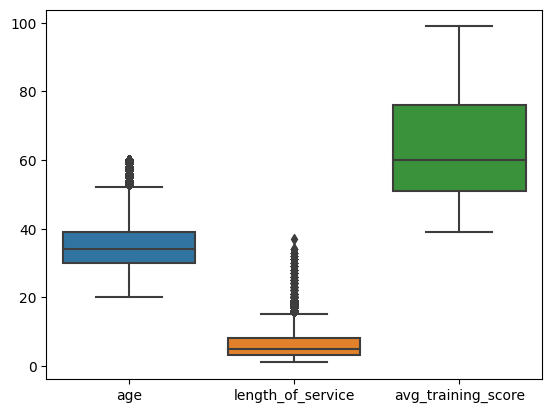

In [ ]:
sns.boxplot(data=df[['age', 'length_of_service', 'avg_training_score']])

In this case the graph shows that both age and length of service have outliers while avg_training score does not have outliers, therefore I am going to use the interquartile range (IQR) to identify observations that fall outside the 0.25 and 0.75 threshold.

In [ ]:
iqr_age = iqr(df['age'])
iqr_age_Lower_Threshold = np.quantile(df['age'],0.25) - 1.5 * iqr_age
iqr_age_Higher_Threshold = np.quantile(df['age'],0.75) + 1.5 * iqr_age
df[(df['age'] < iqr_age_Lower_Threshold) | (df['age'] < iqr_age_Higher_Threshold)]
df


,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54802,Sales & Marketing,region_14,Bachelor's,m,other,2,31,1.0,2,0,0,49,0
54803,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0


In [ ]:
iqr_length_of_service = iqr(df['length_of_service'])
iqr_length_of_service_Lower_Threshold = np.quantile(df['length_of_service'],0.25) - 1.5 * iqr_length_of_service
iqr_length_of_service_Higher_Threshold = np.quantile(df['length_of_service'],0.75) + 1.5 * iqr_length_of_service
df[(df['length_of_service'] < iqr_length_of_service_Lower_Threshold) | (df['length_of_service'] < iqr_length_of_service_Higher_Threshold)]
df

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54802,Sales & Marketing,region_14,Bachelor's,m,other,2,31,1.0,2,0,0,49,0
54803,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0


Based on the previous analysis non outliers have been removed on the continous numerical values according to the interquartile range (IQR) method, therefore we continue to map the categorical values in to numerical values. To identify how many categories I have per categoric values the value counts method is used.

In [ ]:
df['education'] = df['education'].str.replace("'", "")
df['education'].value_counts()

<ipython-input-24-ebd78ba9dfcd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['education'] = df['education'].str.replace("'", "")


Bachelors          33355
Masters & above    14794
Below Secondary      458
Name: education, dtype: int64

In [ ]:
df['gender'].value_counts()

m    33816
f    14791
Name: gender, dtype: int64

In [ ]:
df['recruitment_channel'].value_counts()

other       26986
sourcing    20601
referred     1020
Name: recruitment_channel, dtype: int64

In [ ]:
df['department'].value_counts()

Sales & Marketing    14217
Operations           10530
Procurement           6637
Technology            6501
Analytics             4605
Finance               2219
HR                    2140
R&D                    893
Legal                  865
Name: department, dtype: int64

In [ ]:
df['region'].value_counts()

region_2     10797
region_22     5427
region_7      4395
region_15     2504
region_13     2459
region_26     1965
region_31     1690
region_4      1626
region_27     1417
region_16     1319
region_11     1189
region_28     1143
region_23     1103
region_29      895
region_19      837
region_20      780
region_32      771
region_14      770
region_17      742
region_25      720
region_5       690
region_10      614
region_30      601
region_6       578
region_8       577
region_1       553
region_24      461
region_12      425
region_21      370
region_3       331
region_9       322
region_33      260
region_34      252
region_18       24
Name: region, dtype: int64

In [ ]:
df['education'] = df['education'].map({'Bachelors':1, 'Masters & above':2, 'Below Secondary':3})
df['gender'] = df['gender'].map({'m':1, 'f':2})
df['recruitment_channel'] = df['recruitment_channel'].map({'other':1, 'sourcing':2, 'referred':3})
df['department'] = df['department'].map({'Sales & Marketing':0, 'Operations':1, 'Procurement':2, 'Technology':3, 'Analytics':4, 'Finance':5, 'HR':6, 'R&D':7, 'Legal':8})
df['region'] = df['region'].map({'region_1':0, 'region_2':1, 'region_3':2, 'region_4':3, 'region_5':4, 'region_6':5, 'region_7':6, 'region_8':7, 'region_9':8, 'region_10':9, 'region_11':10, 'region_12':11, 'region_13':12, 'region_14':13, 'region_15':14, 'region_16':15, 'region_17':16, 'region_18':17, 'region_19':18, 'region_20':19, 'region_21':20, 'region_22':21, 'region_23':22, 'region_24':23, 'region_25':24, 'region_26':25, 'region_27':26, 'region_28':27, 'region_29':28, 'region_30':29, 'region_31':30, 'region_32':31, 'region_33':32, 'region_34':33})
df

<ipython-input-29-117f6d337120>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['education'] = df['education'].map({'Bachelors':1, 'Masters & above':2, 'Below Secondary':3})
<ipython-input-29-117f6d337120>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender'] = df['gender'].map({'m':1, 'f':2})
<ipython-input-29-117f6d337120>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,0,6,2,2,2,1,35,5.0,8,1,0,49,0
1,1,21,1,1,1,1,30,5.0,4,0,0,60,0
2,0,18,1,1,2,1,34,3.0,7,0,0,50,0
3,0,22,1,1,1,2,39,1.0,10,0,0,50,0
4,3,25,1,1,1,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54802,0,13,1,1,1,2,31,1.0,2,0,0,49,0
54803,3,13,1,1,2,1,48,3.0,17,0,0,78,0
54804,1,26,2,2,1,1,37,2.0,6,0,0,56,0
54805,4,0,1,1,1,1,27,5.0,3,1,0,79,0


Now that the categorical values have been mapped we are ready to start analysing the dataset.

After the complete data cleaning process our analysis dataframe has 48607 entries and 13 variables.

## **2. Analysis**

On this section we will execute an in depth analysis to anwser the first research question. Then hyphotesis test to answer second and third research question and finally deploy a ML model to answer the fourth research question.

### **2.1 Exploratory Data Analysis (EDA)**


The EDA includes both a statisticall analysis and graphical analysis of the differrent variables on the dataset. The objective is to be able to answer the first research question:

1. What are the most infuential variables affecting affecting arrival time?

In [ ]:
df.describe()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,48607.000000,48607.000000,48607.000000,48607.000000,48607.000000,48607.000000,48607.000000,48607.000000,48607.000000,48607.000000,48607.000000,48607.000000,48607.000000
mean,2.033308,13.118645,1.323204,1.304298,1.465797,1.252186,35.592199,3.337750,6.312465,0.356533,0.023165,63.609151,0.087045
std,2.028178,10.038777,0.487435,0.460114,0.539264,0.605199,7.536432,1.257853,4.205675,0.478980,0.150430,13.274746,0.281904
min,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,30.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,1.000000,12.000000,1.000000,1.000000,1.000000,1.000000,34.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,3.000000,21.000000,2.000000,2.000000,2.000000,1.000000,39.000000,4.000000,8.000000,1.000000,0.000000,76.000000,0.000000
max,8.000000,33.000000,3.000000,2.000000,3.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [ ]:
df['is_promoted'].value_counts()

0    44376
1     4231
Name: is_promoted, dtype: int64

In [ ]:
df['is_promoted'].value_counts(normalize=True)

0    0.912955
1    0.087045
Name: is_promoted, dtype: float64

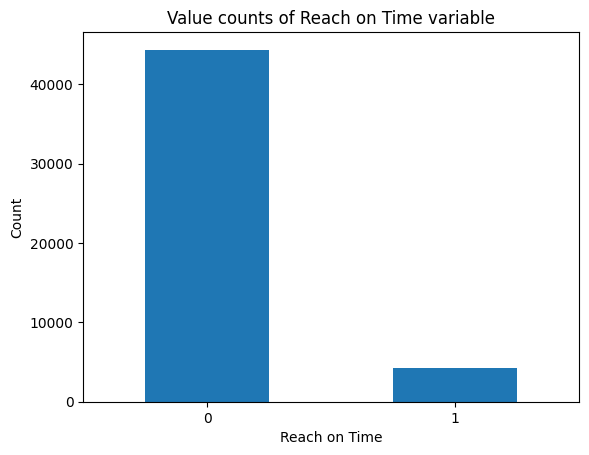

In [ ]:
df['is_promoted'].value_counts().plot(kind="bar")
plt.title("Value counts of Reach on Time variable")
plt.xlabel("Reach on Time")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

In [ ]:
df.groupby('is_promoted').mean()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
is_promoted,,,,,,,,,,,,
0,2.035177,13.156684,1.319429,1.302619,1.463809,1.256873,35.64465,3.276118,6.331147,0.324004,0.014017,62.873423
1,2.013708,12.719688,1.362798,1.321910,1.486646,1.203025,35.04207,3.984165,6.116521,0.697707,0.119121,71.325691


First we explored the current status of the variable "is_promoted" it can be seen that only 8.7% of the empoyees are promoted while 91.3% are not. Also exploring the mean values of the variables when grouped by the study variable it can be seen there are no high differrences between the two groups besides the one seen for "awards_won" and "avg_training_score", which probably means these two variables have the highest relevance when promoting an employee.

Now to have a fast visualization of the different potential relationship between the dataset variables and the variable in study "is_promoted" a pairplot is used instead of comparing variable by variable. The pairplot shows wheter an employee is promoted or not by using different colors

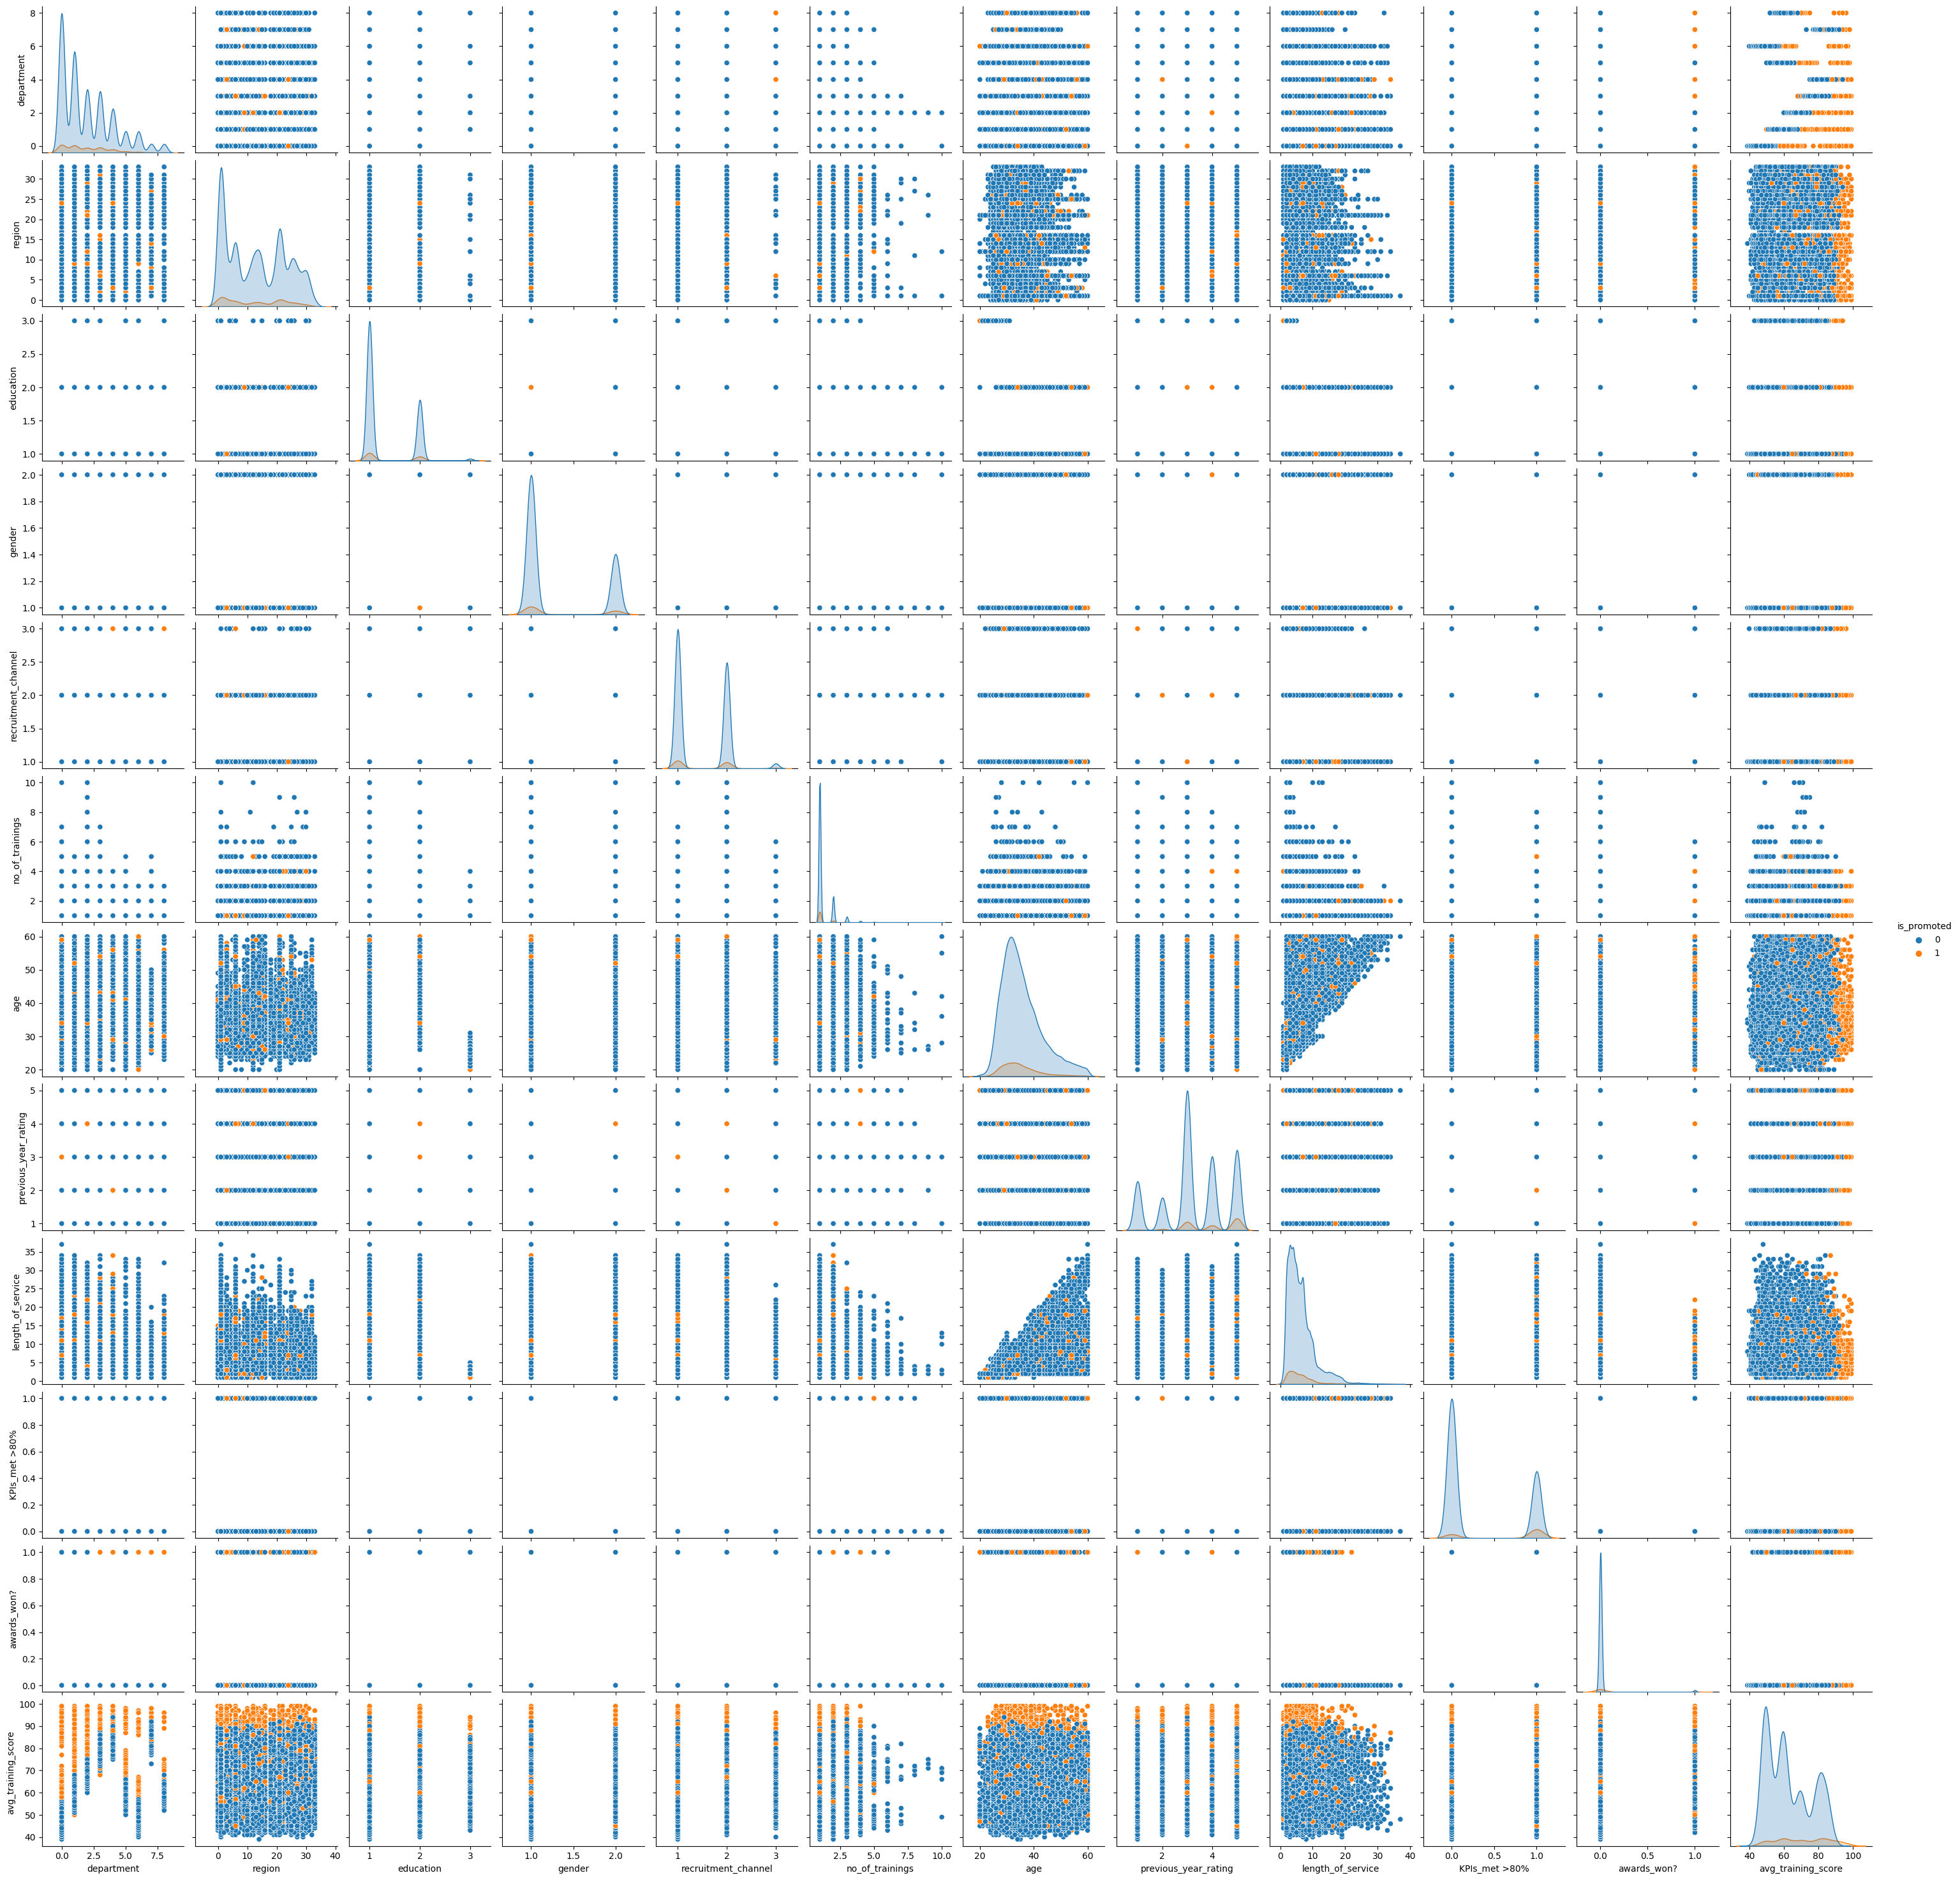

In [ ]:
sns.pairplot(df, hue="is_promoted")

From the pairplot there are three relationships that are worth exploring

1. Is promoted vs Avg Training Score
1. Is promoted vs Length of service
1. Avg Training Score, Length of Service Explained by Is Promoted

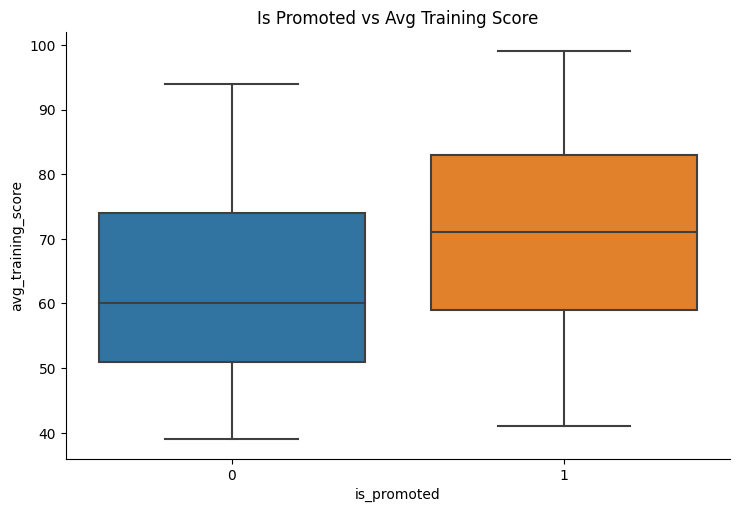

In [ ]:
sns.catplot(x="is_promoted", y="avg_training_score", data=df, kind="box", aspect=1.5)
plt.title("Is Promoted vs Avg Training Score")
plt.show()

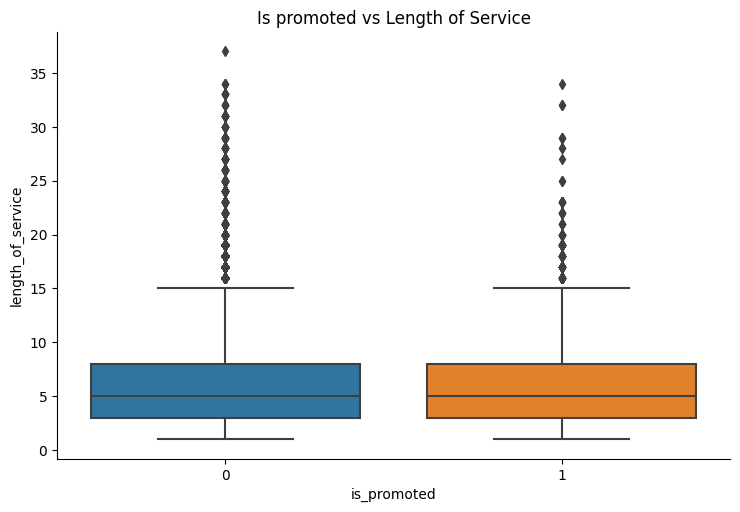

In [ ]:
sns.catplot(x="is_promoted", y="length_of_service", data=df, kind="box", aspect=1.5)
plt.title("Is promoted vs Length of Service")
plt.show()

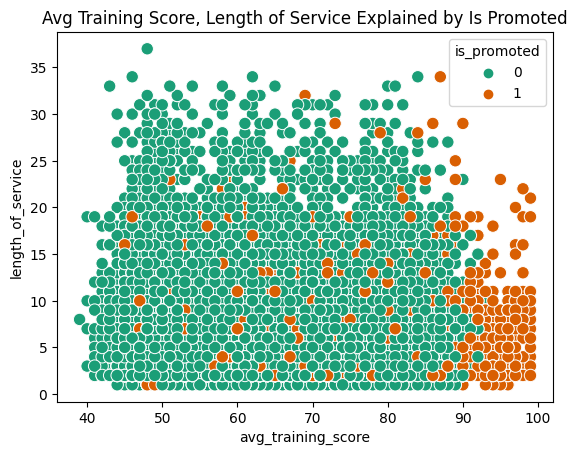

In [ ]:
sns.scatterplot(x="avg_training_score", y="length_of_service", hue="is_promoted", data=df, palette="Dark2", s=80)
plt.title("Avg Training Score, Length of Service Explained by Is Promoted")
plt.show()

Considering the analysis of the previously relationships it can be identified that having a higher training score is linked to having a promotion while the length of service has little to none effect on having a promotion. In addition, is interesting when combining the 3 variables under a scatter plot these previous assumptions are confirmed true, since it can be seen that the color orange (which means having a promotion) is prominent on the right side of the plot where the higher training score are. Let's finish this EDA by analyzing the correlation matrix of the variables in the dataset.

In [ ]:
df.corr()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
department,1.000000,-0.013060,0.022532,-0.014653,-0.007282,-0.008939,-0.105107,0.072307,-0.086198,0.050357,0.004349,0.496245,-0.002984
region,-0.013060,1.000000,-0.119424,-0.106725,-0.024981,-0.005389,-0.266948,-0.023374,-0.172045,-0.010175,0.007267,0.026149,-0.012272
education,0.022532,-0.119424,1.000000,0.027656,-0.012654,-0.033395,0.259099,0.017145,0.162935,0.008360,-0.001663,0.022846,0.025082
gender,-0.014653,-0.106725,0.027656,1.000000,-0.006766,-0.085489,0.002384,0.022727,0.011082,0.038043,-0.002271,0.017738,0.011819
recruitment_channel,-0.007282,-0.024981,-0.012654,-0.006766,1.000000,-0.017067,-0.027250,0.033182,-0.013403,0.018777,-0.004942,0.008462,0.011938
no_of_trainings,-0.008939,-0.005389,-0.033395,-0.085489,-0.017067,1.000000,-0.083693,-0.064272,-0.055460,-0.046798,-0.008579,0.041909,-0.025083
age,-0.105107,-0.266948,0.259099,0.002384,-0.027250,-0.083693,1.000000,0.004946,0.620316,-0.033927,-0.010395,-0.066263,-0.022540
previous_year_rating,0.072307,-0.023374,0.017145,0.022727,0.033182,-0.064272,0.004946,1.000000,-0.001329,0.352296,0.027910,0.069972,0.158684
length_of_service,-0.086198,-0.172045,0.162935,0.011082,-0.013403,-0.055460,0.620316,-0.001329,1.000000,-0.089058,-0.043798,-0.047447,-0.014386
KPIs_met >80%,0.050357,-0.010175,0.008360,0.038043,0.018777,-0.046798,-0.033927,0.352296,-0.089058,1.000000,0.095238,0.073895,0.219943


<Axes: >

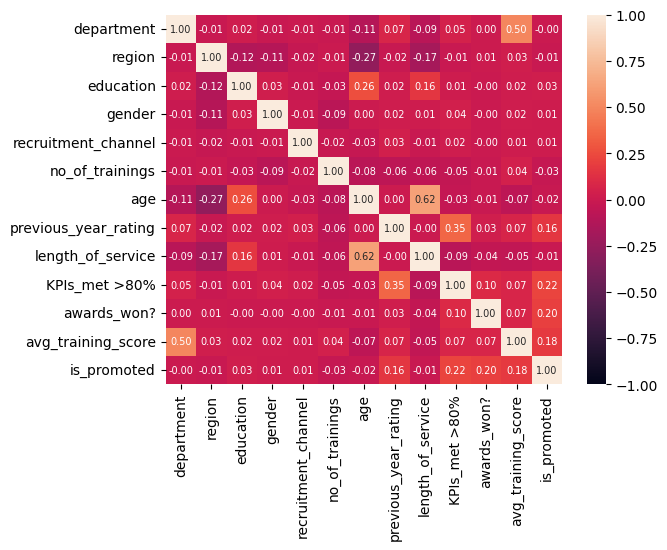

In [ ]:
sns.heatmap(df.corr(), vmin=-1, vmax=1, fmt='.2f', annot_kws={'size': 7},annot=True)

From the correlation matrix the higher correlation values are between Length of service vs age with 0.62, avg_training_score vs department with 0.5 and KPIs_Met vs Previous year rating with 0.35. Meaning there is a positive to moderate positive correlation between these variables. All these correlations seems coherent since usually Older people have a higher length of service, and meeting KPIs should lead to a higher rating. The interesting part would be to look at why there is a strong correlation between training score and departments, this probably means a department is outperforming the others or training evaluations are easier for this department. Something relevant from the business point of view.

Now that the previous fact have been stated let's shift back the focus to the decision variable "is_promoted?". Looking at these variable the higher correlation are with KPIs_Met, awards_won, avg_trainin_score, and previous_year_rating. With scores of 0.22, 0.20, 0.18 and 0.16 respectively. Making it a weak positive correlation. It is coherent that these variables which are usually associated with an employee performance have the highest correlation with a promotion decision.

To answer our first research question:

- What are the most infuential variables affecting promotions?


Based only on the descriptive analysis the most influential factors affecting a promotion are KPIs_Met, awards_won, avg_trainin_score, and previous_year_rating, all performance metrics.


### **2.2 Hyphotesis Testing**

This section aims to answer the following research questions:

- Is there a significant difference in training scores between different recruitment channels?
- Is there a significant difference in training scores between different genders?

To answer the first question an ANOVA test is used to determine whether there is a statistically significant difference between the means of the groups since there are multiple recruitment channels. To answer the second question a ttest is used since we only have two study groups for the gender variable.

In [ ]:
df['recruitment_channel'].value_counts()

1    26986
2    20601
3     1020
Name: recruitment_channel, dtype: int64

In [ ]:
channel1 = df[df['recruitment_channel']==1]['avg_training_score']
channel2 = df[df['recruitment_channel']==2]['avg_training_score']
channel3 = df[df['recruitment_channel']==3]['avg_training_score']

f_stat, p_value = stats.f_oneway(channel1, channel2, channel3)
print('F-statistic:', f_stat)
print('p-value:', p_value)

F-statistic: 24.147369578764756
p-value: 3.297139797544039e-11


In this case the F-statistic is 24.147369578764756, which is very large. The p-value is 3.297139797544039e-11, which is very small.

Since the p-value is below the significance value set in 0.05, we can reject the null hypothesis of the ANOVA test.

To answer our second research question:

- Is there a significant difference in training scores between different recruitment channels?

There is a statistically significant difference between the recruitment channel means.



In [ ]:
df['gender'].value_counts()

1    33816
2    14791
Name: gender, dtype: int64

In [ ]:
Gender1 = df[df['gender']==1]['avg_training_score']
Gender2 = df[df['gender']==2]['avg_training_score']


t_stat, p_value = stats.ttest_ind(Gender1, Gender2)
print('T-statistic:', t_stat)
print('P-value:', p_value)

T-statistic: -3.911217966729085
P-value: 9.195658821352498e-05


In this case the t-statistic is negative -3.911217966729085, which indicates that the mean of the first group (Male) is lower than the mean of the second group (Female) (assuming that the first group corresponds to the sample with a negative t-statistic).

The absolute value of the t-statistic is large which suggests that the difference between the means of the two groups is large. The p-value (9.195658821352498e-05) is lower than the significance level of 0.05, which indicates that we can reject the null hypothesis of the t-test.

To answer our third research question:

- Is there a significant difference in training scores between different genders?

There is a statistically significant difference between the gender means.


As a conclusion based on the results from the ANOVA and T-test, the answer to both questions is: yes, based on the available dataset there is a significance differrence between the target variable and the tested variables. These results are coherent with what we observed on the descriptive analysis.

### **2.3 Model Building**

This section aims to answer the following research question:

- How can I predict if my employee will be promoted?

To know what model is better to deploy I will use AutoML library which will helps understand which model is the most accurate for the problem I am trying to solve and then I will run the suggested solution (if coding knowledge allows it). In order to run this library some set up steps need to be done, which are:

In [ ]:
#Install numpy v 1.20.0 to be able to run AutoML
!pip3 install numpy==1.20


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 37.2 MB/s eta 0:00:00


In [ ]:
#Check that the version of numpy was successfully changed
import numpy
numpy.__version__

In [ ]:
#Install AutoMl libraries
!pip install pycaret
!pip install mlflow
!pip install gradio
!pip install jinja2
!pip install markupsafe==2.0.1

In [ ]:
#Import AutoML libraries
import mlflow
import jinja2
from pycaret.classification import *
from pycaret.datasets import get_data
from pycaret.classification import *

In [ ]:
clf1=setup(df,target='is_promoted',log_experiment = True, experiment_name = 'RMS1',use_gpu=True)

In [ ]:
best_model=compare_models()

From evaluating differrent Machine Learning algorithms the main insight is that classification algorithms such as Light Gradient Boosting, Gradient Boosting Classifier and Random Forest Classifier perform better on the dataset (they have a better accuracy, which means are more probable to give a correct prediction), meaning the problem to solve is a classification problem.

So to solve our research question we should focus on classification algorithms, based on my coding knowledge we will test a random forest classifier and a logistic regression on the dataset.



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

**Logistic Regression**

In [ ]:
X = df.drop('is_promoted', axis=1)
y = df['is_promoted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("Logistic Regression Score Test: {:.2f}".format(logreg.score(X_test, y_test)))
print("Logistic Regression Score Train: {:.2f}".format(logreg.score(X_train, y_train)))

coefs = pd.DataFrame({'feature': X_train.columns, 'coef': logreg.coef_[0]})
coefs = coefs.sort_values('coef', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(y=coefs['feature'], width=coefs['coef'], color='b')
plt.title('Logistic Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.show()

**Random Forest Classifier**

In [ ]:
X = df.drop('is_promoted', axis=1)
y = df['is_promoted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

accuracy_test = rfc.score(X_test, y_test)
print("Random Forest Score Test:", accuracy_test)
accuracy_train = rfc.score(X_train, y_train)
print("Random Forest Score Train:", accuracy_train)

importances = pd.Series(rfc.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.show()

From the two models runned some important insight can be seen:
- Both models get very similar scores to the one suggested by the AutoML library which confirms the question can be solved with classification algorithms.
- The Random Forest perform slightly better than the logistic regression with a score of 0.93 to a score of 0.92. Meaning both algorithms are reliable to use to predict an employee promotion.

### **2.4 Results Interpretation**

According to the given results we can identify and to answer the research question:

- How can I predict if my employee will be promoted?

1. The problem to solve is a classification problem, probably due that the prediction variable is a binary categorical variable.
1. According to the logistic regression the three more relevant variables are "awards_won?", "KPIs_met>80%", and "Previous_year_rating". According to the random forest classifier the three more relevant variables are "avg_training_score", "age", and "region".
1. Interestingly both models score are similar score as the AutoML library suggested, and both models score higher than 0.90. Considering the amount of data under study this results seems to be reliable. Eventhough the score are high they are not 1 or very close to 1 which suggest we don't have an overfitting problem for this dataset.

## **3. Managerial Recommendations**

Based on all the analysis executed I put forward the following recommendations for the company:

- According to the descriptive analysis studying the "is_promoted?" variable it has been stated that most relevant variables are KPIs_Met, awards_won, avg_trainin_score, and previous_year_rating. All these variables are performance metrics, meaning the company has been using a merit based promotion system. According to McKinsey & Co this approach is good to have a fair competition of employees within in the company which will lead to better performance and efficiency. Therefore this promotion selection method is encourage to continue being used.   
- According to the hypothesis testing categories such as gender or recruitment channel does have a significant difference on avg training score. Therefore, the client should focus on understanding what are the reasons behind the differrence between the groups to get better training scores. Since I don't have information on the specific type of training for each given group proposing an action is difficult but assuring the same level of difficulty for the different group should be achieved to have a fair competition. If the scenario is trainings are exactly the same then here we have an interesting opportunity to increase employee performance by replicating the good practices or characteristics of the groups that performed better.
- According to the classification algorithm tested the most important variables affecting wheter an employee is promoted or not are:

  - Logistic regression: "awards_won?", "KPIs_met>80%", and "Previous_year_rating".
  - Random forest classifier: "avg_training_score", "age", and "region".

Therefore, the client should focus on wheter their promotion process is more a merit based process or a diversity/inclusion based process. Defining which is more apropiate to the company's culture will determine which algorithm is better suited. But since both algorithms prediciton score are basically the same, we can say that independant of the answer to the previous suggested question, focussing on the mentioned variables will help identify which employees are prone to having a promotion.


To finalize it can be said that the dataset provided by the client is relevant and gives relevant insight to execute data driven business decisions. A possible second analysis for the company will be collecting data on other factors on satisfaction metrics such as work control and flexibility, goal driven or time driven, purpose alignment and/or teamwork score. These previously suggested metrics according to McKinsey & Co give value insights on business performance and efficency leading to higher revenue growth and organizational benefits.

## **4. Conclusions**

In summary, out of this analysis the main insights are:

1. The results from the descriptive analysis, hypothesis testing and machine learning algorithms are coherent within one another.
1. For the model creation it has been stablished the problem under study is a classification model.
1. If the client want better training scores it should focus on the training characteristics to replicate those of the better performing groups in to the less performing groups. If the client want accurate employee promotion prediction it should continue their current promotion strategy since it is having an accurate result.
1. The score of the model tested can be considered high since is is higher than 90%, therefore as mentioned on the recommendations by collecting more data on differrent metrics can give even more valuable insights, but the current dataset understudy performs good to answer the proposed research questions.

## **5. References**

- Alzubi, J., Nayyar, A., & Kumar, A. (2018). Machine Learning from Theory to Algorithms: An Overview. Journal of Physics: Conference Series, 1142, 012012. https://doi.org/10.1088/1742-6596/1142/1/012012
- Bhaskaran, S., Davis, A., Desbrière, C., & Wasserteil, S. (2022). Bridging the advancement gap: What frontline employees want-and what employers think they want.
- Emmett, J., Komm, A., Moritz, S., & Schultz, F. (2021). This time it’s personal:  Shaping the ‘new possible’  through employee experience.
- Pol, U. (2021). Automl: Building An Classfication Model With Pycaret AutoML using PyCaret View project Educational Data Mining View project. https://doi.org/10.37896/YMER20.11/50
- Sarker, I. H. (2021). Machine Learning: Algorithms, Real-World Applications and Research Directions. SN Computer Science, 2(3), 160. https://doi.org/10.1007/s42979-021-00592-x
- Smit, S., Chui, M., Bradley, C., Krishnan, M., Ellingrud, K., Madgavkar, A., Piccitto, M., Mischke, J., White, O., Seong, J., Woetzel, J., & Tacke, T. (2023). Performance through people. www.mckinsey.com/mgi.


